In [1]:
import pandas as pd

In [11]:
xl=pd.ExcelFile('Final_project_2017-2018.xlsx')
xl1=pd.ExcelFile('Final_project_2018-2019.xlsx')
xl2=pd.ExcelFile('Final_project_2019-2020.xlsx')


In [22]:
df_1=pd.read_excel(xl, 'By month')
df_2=pd.read_excel(xl1, 'By month')
df_3=pd.read_excel(xl2, 'By month')


In [23]:
df_1['Fin. Year of Offence'].fillna(method='ffill', inplace=True)
df_1['Month of Offence'].fillna(method='ffill', inplace=True)

df_2['Fin. Year of Offence'].fillna(method='ffill', inplace=True)
df_2['Month of Offence'].fillna(method='ffill', inplace=True)

 

df_3['Fin. Year of Offence'].fillna(method='ffill', inplace=True)
df_3['Month of Offence'].fillna(method='ffill', inplace=True)
 



In [50]:
df= pd.concat([df_1, df_2, df_3], ignore_index=True)
df


,Fin. Year of Offence,Month of Offence,Offence Category,Number of Penalty Notices,Face Value ($),Demerit Points
0,2017-2018,2017-07-01,A. Parking in a disabled area without a permit,1384,759816,1384
1,2017-2018,2017-07-01,B. Leaving a stationary vehicle on or near a c...,150,51680,170
2,2017-2018,2017-07-01,C. Parking in an intersection,16,4112,0
3,2017-2018,2017-07-01,D. Parking within 10 metres of an intersection...,1472,378304,0
4,2017-2018,2017-07-01,E. Parking within 20 metres of an intersection...,9,2313,0
...,...,...,...,...,...,...
135,2019-2020,2019-10-01,A. Parking in a disabled area without a permit,1399,800228,1399
136,2019-2020,2019-10-01,B. Leaving a stationary vehicle on or near a c...,126,47186,252
137,2019-2020,2019-10-01,C. Parking in an intersection,31,10890,62
138,2019-2020,2019-10-01,D. Parking within 10 metres of an intersection...,966,333660,1932


In [98]:
df['Month of Offence'] = pd.to_datetime(df['Month of Offence'])

In [99]:
df.dtypes

Fin. Year of Offence                 object
Month of Offence             datetime64[ns]
Offence Category                     object
Number of Penalty Notices             int64
Face Value ($)                        int64
Demerit Points                        int64
dtype: object

In [101]:
df['Month of Offence'] = df['Month of Offence'].dt.to_period('M').astype(str)
df.head()

,Fin. Year of Offence,Month of Offence,Offence Category,Number of Penalty Notices,Face Value ($),Demerit Points
0,2017-2018,2017-07,A. Parking in a disabled area without a permit,1384,759816,1384
1,2017-2018,2017-07,B. Leaving a stationary vehicle on or near a c...,150,51680,170
2,2017-2018,2017-07,C. Parking in an intersection,16,4112,0
3,2017-2018,2017-07,D. Parking within 10 metres of an intersection...,1472,378304,0
4,2017-2018,2017-07,E. Parking within 20 metres of an intersection...,9,2313,0


In [103]:
df.dtypes

Fin. Year of Offence         object
Month of Offence             object
Offence Category             object
Number of Penalty Notices     int64
Face Value ($)                int64
Demerit Points                int64
dtype: object

In [105]:
df.isna().sum()

Fin. Year of Offence         0
Month of Offence             0
Offence Category             0
Number of Penalty Notices    0
Face Value ($)               0
Demerit Points               0
dtype: int64

In [62]:
#Calculating the total number of penalty notices per offence category per financial year

Total_penalty_Yearwise= df.groupby(['Fin. Year of Offence', 'Offence Category'])['Number of Penalty Notices'].sum().reset_index()
Total_penalty_Yearwise

,Fin. Year of Offence,Offence Category,Number of Penalty Notices
0,2017-2018,A. Parking in a disabled area without a permit,16770
1,2017-2018,B. Leaving a stationary vehicle on or near a c...,2284
2,2017-2018,C. Parking in an intersection,287
3,2017-2018,D. Parking within 10 metres of an intersection...,16079
4,2017-2018,E. Parking within 20 metres of an intersection...,159
5,2018-2019,A. Parking in a disabled area without a permit,17073
6,2018-2019,B. Leaving a stationary vehicle on or near a c...,2118
7,2018-2019,C. Parking in an intersection,320
8,2018-2019,D. Parking within 10 metres of an intersection...,12539
9,2018-2019,E. Parking within 20 metres of an intersection...,352


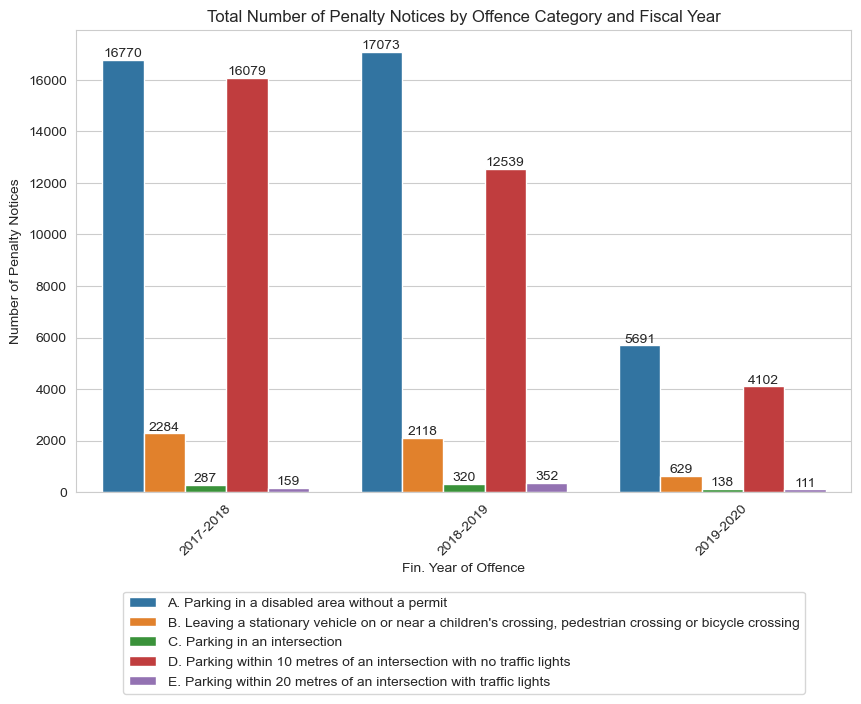

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting the style of the plot
sns.set_style("whitegrid")

# Setting the figure size
fig, ax = plt.subplots(figsize=(10, 6))

#Grouped Bar Plot
sns.barplot(x="Fin. Year of Offence", y="Number of Penalty Notices", hue="Offence Category", data=Total_penalty_Yearwise, ax=ax)

# Adding value labels inside the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{int(height)}", (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

#labels and title
ax.set_xlabel("Fin. Year of Offence")
ax.set_ylabel("Number of Penalty Notices")
ax.set_title("Total Number of Penalty Notices by Offence Category and Fiscal Year")

plt.xticks(rotation=45)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=1)

# Displaying the plot
plt.show()


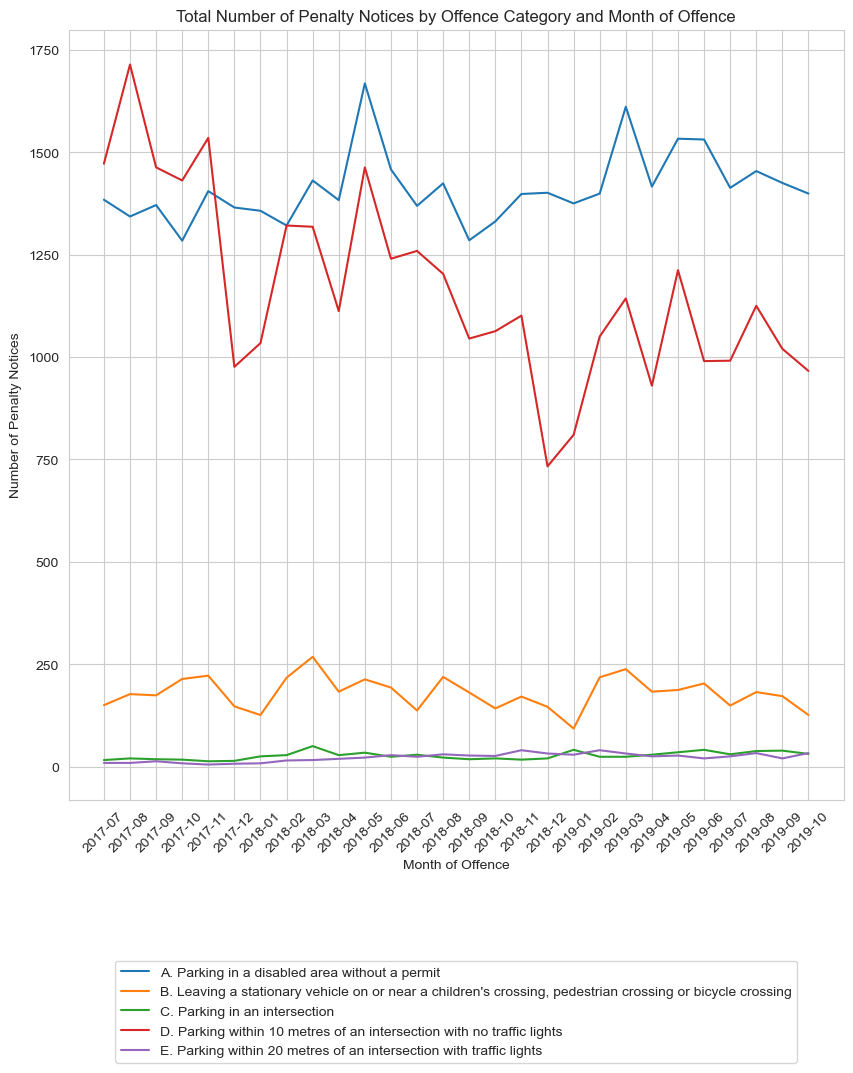

In [115]:
#Monthly Plotting Of the Total Offences

# Setting the style of the plot
sns.set_style("whitegrid")

# Creating a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Plotting the line plot
sns.lineplot(x="Month of Offence", y="Number of Penalty Notices", hue="Offence Category", data=df, ax=ax)

#labels and title
ax.set_xlabel("Month of Offence")
ax.set_ylabel("Number of Penalty Notices")
ax.set_title("Total Number of Penalty Notices by Offence Category and Month of Offence")

# Rotating x-axis
plt.xticks(rotation=45)


ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=1)

# Showing the plot
plt.show()


In [204]:
# Total Stats Per Offence Category Till Date

total_stats = df.groupby('Offence Category').agg({'Number of Penalty Notices': 'sum', 'Face Value ($)': 'sum', 'Demerit Points': 'sum'}).reset_index()
total_stats_sort = total_stats.sort_values('Number of Penalty Notices', ascending=False)
total_stats_sort



,Offence Category,Number of Penalty Notices,Face Value ($),Demerit Points
0,A. Parking in a disabled area without a permit,39534,22039935,39534
3,D. Parking within 10 metres of an intersection...,32720,10289006,46394
1,B. Leaving a stationary vehicle on or near a c...,5031,1862224,9168
2,C. Parking in an intersection,745,249437,1246
4,E. Parking within 20 metres of an intersection...,622,205413,1126


In [209]:
total_stats_sorted['Average Face Value per Number of Penalties'] = total_stats_sort['Face Value ($)'] / total_stats_sort['Number of Penalty Notices']

total_stats_sorted['Average Demerit Points per Number of Penalties'] = total_stats_sort['Demerit Points'] / total_stats_sort['Number of Penalty Notices']


In [210]:
#Calculating the average face value and average demerit points per number of penalty per offence category
average_stats= total_stats_sorted.drop(['Face Value ($)', 'Demerit Points'], axis=1)
average_stats

,Offence Category,Number of Penalty Notices,Average Face Value per Number of Penalties,Average Demerit Points per Number of Penalties
0,A. Parking in a disabled area without a permit,39534,557.493170,1.000000
3,D. Parking within 10 metres of an intersection...,32720,314.456174,1.417910
1,B. Leaving a stationary vehicle on or near a c...,5031,370.149871,1.822302
2,C. Parking in an intersection,745,334.814765,1.672483
4,E. Parking within 20 metres of an intersection...,622,330.245981,1.810289


C:\Users\adbsa\AppData\Local\Temp\ipykernel_16244\2654808509.py:23: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend(axes[0].patches, labels=offense_categories, loc='center', bbox_to_anchor=(0.5, 0.05))


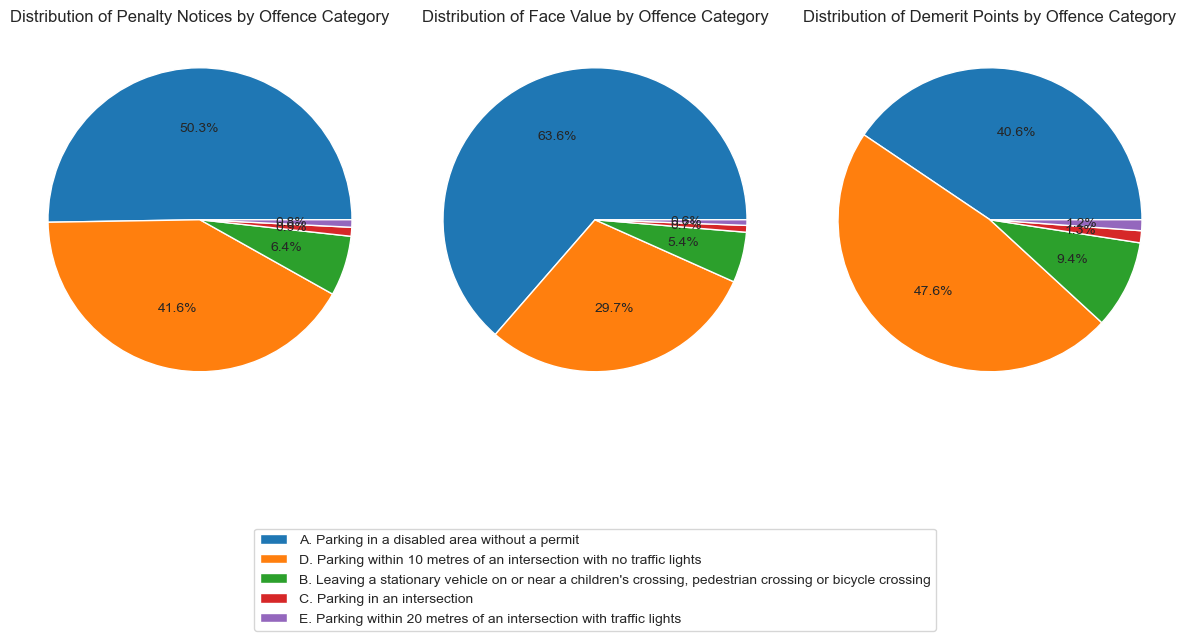

In [179]:
# Getting the offense categories and data values for each column
offense_categories = total_stats_sorted['Offence Category'].tolist()
penalty_notices_values = total_stats_sorted['Number of Penalty Notices'].tolist()
face_value_values = total_stats_sorted['Face Value ($)'].tolist()
demerit_points_values = total_stats_sorted['Demerit Points'].tolist()

# Creating a figure with three subplots for the pie charts
fig, axes = plt.subplots(1, 3, figsize=(12, 8))

# Plotting the pie chart for Number of Penalty Notices
axes[0].pie(penalty_notices_values, labels=None, autopct='%1.1f%%')
axes[0].set_title('Distribution of Penalty Notices by Offence Category')

# Plotting the pie chart for Face Value ($)
axes[1].pie(face_value_values, labels=None, autopct='%1.1f%%')
axes[1].set_title('Distribution of Face Value by Offence Category')

# Plotting the pie chart for Demerit Points
axes[2].pie(demerit_points_values, labels=None, autopct='%1.1f%%')
axes[2].set_title('Distribution of Demerit Points by Offence Category')

# Adding a single legend for all pie charts
fig.legend(axes[0].patches, labels=offense_categories, loc='center', bbox_to_anchor=(0.5, 0.05))

# Adjusting the layout of subplots
plt.tight_layout()

# Displaying the charts
plt.show()


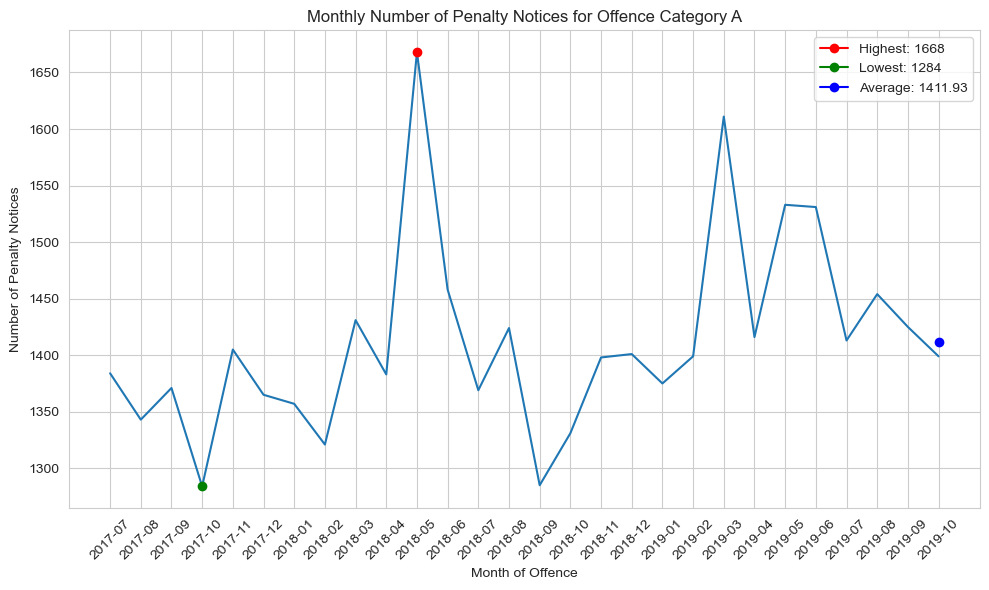

In [154]:
#Since A is the most popular offence category, Here is the further analysis of category A

# Setting the style of the plot
sns.set_style("whitegrid")

# Creating a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Grouping the data by month and calculating the sum of penalty notices
monthly_data = offence_category_A.groupby('Month of Offence')['Number of Penalty Notices'].sum().reset_index()

# Plotting the data as a line chart
sns.lineplot(x='Month of Offence', y='Number of Penalty Notices', data=monthly_data, ax=ax)

# Finding the highest, lowest, and average values
max_value = monthly_data['Number of Penalty Notices'].max()
min_value = monthly_data['Number of Penalty Notices'].min()
average_value = monthly_data['Number of Penalty Notices'].mean()

# Adding markers for the highest, lowest, and average values
ax.plot(monthly_data[monthly_data['Number of Penalty Notices'] == max_value]['Month of Offence'],
        max_value, marker='o', color='red', label=f'Highest: {max_value}')
ax.plot(monthly_data[monthly_data['Number of Penalty Notices'] == min_value]['Month of Offence'],
        min_value, marker='o', color='green', label=f'Lowest: {min_value}')
ax.plot(monthly_data['Month of Offence'].iloc[-1],
        average_value, marker='o', color='blue', label=f'Average: {average_value:.2f}')

#labels and title
ax.set_xlabel('Month of Offence')
ax.set_ylabel('Number of Penalty Notices')
ax.set_title('Monthly Number of Penalty Notices for Offence Category A')

# Rotat ingx-axis 
plt.xticks(rotation=45)

# Adding a legend
plt.legend()

# Displaying the plot
plt.tight_layout()
plt.show()


In [149]:
#Monthly Analysis According To Number Of Offences
monthly=df.groupby('Month of Offence')['Number of Penalty Notices'].sum().reset_index()

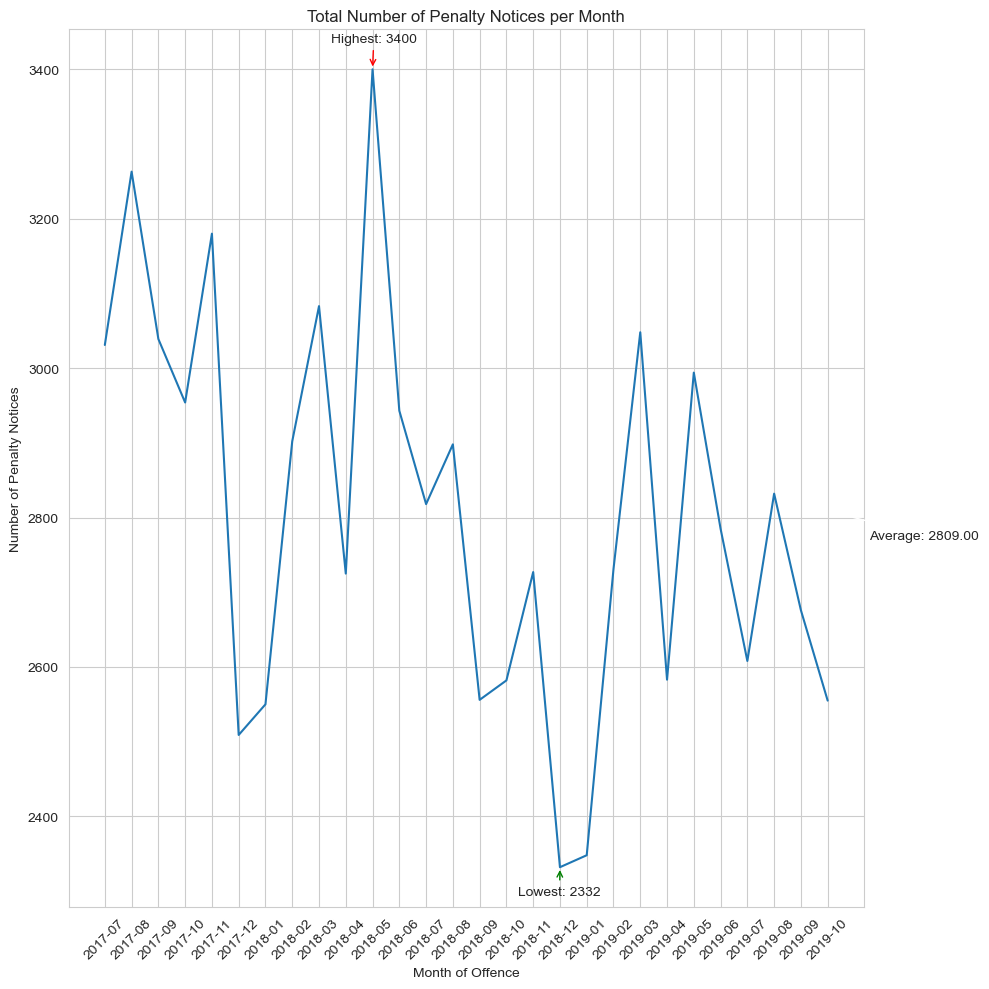

In [148]:
#Plotting the total number of penalty notices per month
plt.figure(figsize=(10, 10))

# Plotting the line chart
plt.plot(monthly['Month of Offence'], monthly['Number of Penalty Notices'])

# Finding the highest, lowest, and average values
max_value = monthly['Number of Penalty Notices'].max()
min_value = monthly['Number of Penalty Notices'].min()
average_value = monthly['Number of Penalty Notices'].mean()

# Adding annotations for the highest, lowest, and average values
plt.annotate(f'Highest: {max_value}', xy=(monthly[monthly['Number of Penalty Notices'] == max_value]['Month of Offence'], max_value),
             xytext=(-30, 20), textcoords='offset points', arrowprops=dict(arrowstyle="->", color='red'))
plt.annotate(f'Lowest: {min_value}', xy=(monthly[monthly['Number of Penalty Notices'] == min_value]['Month of Offence'], min_value),
             xytext=(-30, -20), textcoords='offset points', arrowprops=dict(arrowstyle="->", color='green'))
plt.annotate(f'Average: {average_value:.2f}', xy=(monthly['Month of Offence'].iloc[-1], average_value),
             xytext=(30, -20), textcoords='offset points', arrowprops=dict(arrowstyle="->"))

# Setting labels and title
plt.xlabel('Month of Offence')
plt.ylabel('Number of Penalty Notices')
plt.title('Total Number of Penalty Notices per Month')

plt.xticks(rotation=45)

# Displaying the plot
plt.tight_layout()
plt.show()
